In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from konlpy.tag import Okt
from functools import reduce
from wordcloud import WordCloud

In [2]:
# 데이터 로드
DATA_PATH = '../data/'
data = pd.read_csv(DATA_PATH + 'ChatbotData.csv', encoding='utf-8')

In [3]:
data.head()
# Q : 질문
# A : 대답
# label : 0, 1, 2

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [4]:
data.describe()

,label
count,11823.000000
mean,0.803180
std,0.812012
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [5]:
# 질문과 대답의 리스트를 합하여 각각을 문장이라는 이름으로 하나의 리스트로 정의
sentences = list(data['Q']) + list(data['A'])
sentences

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [6]:
# 각 문장을 띄어쓰기로 분리 = 토큰(어절 : 문장 성분의 최소 단위)
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
# 각 문장의 띄어쓰기를 제거 = 음절(소리(발화)의 최소 단위)
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

okt = Okt()
# 각 문장의 띄어쓰기를 제거하고 okt의 morphs 함수를 통해 형태소로 구분
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

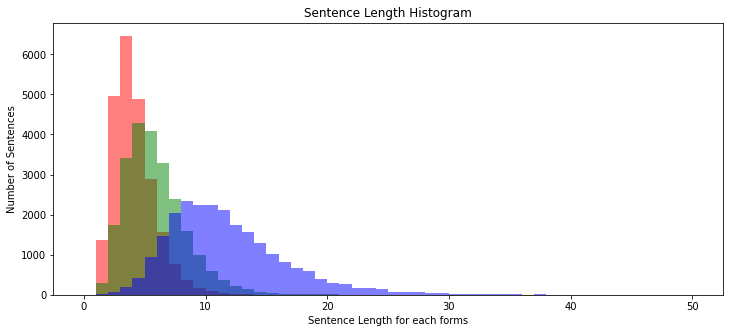

In [7]:
# 문장 길이에 대한 히스토그램
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length for each forms')
plt.ylabel('Number of Sentences')

# 어절(단어단위) : sent_len_by_token -> Red color
# 형태소 단위 : sent_len_by_morph -> Grean color
# 음절(문자단위) : sent_len_by_emjeol -> Blue color

# 성분의 개수(각 형태 별 문장길이)에 대한 문장의 수를 도식화
# 음절로 나누었을 때의 개수가 넓게 퍼져있고, 어절로 나누었을 때는 좁다.

Text(0, 0.5, 'Number of Sentences')

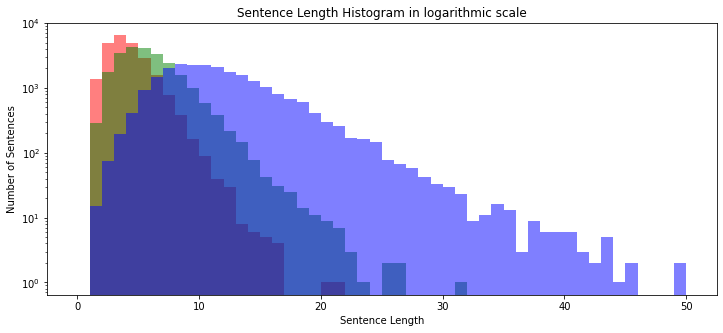

In [8]:
# Log-scale 을 활용 -> 데이터 수가 많을 때 시각화에서 비교 용이
plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='token')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='emjeol')

plt.yscale('log')
plt.title('Sentence Length Histogram in logarithmic scale')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [9]:
# 각각의 통계값 출력
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [10]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1 사분위 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3 사분위 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간길이: 5.0
형태소 1 사분위 길이: 4.0
형태소 3 사분위 길이: 7.0


In [11]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1 사분위 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3 사분위 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1 사분위 길이: 8.0
음절 3 사분위 길이: 14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0c55368e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0c5536e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0c5536760>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff0c553e3a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0c553e8e0>,
 'means': [<matplotlib.lines.Line2D at 0x7ff0c553e640>,
  <matplotlib.lines.Line2D at 0x7ff0c54a1160>]}

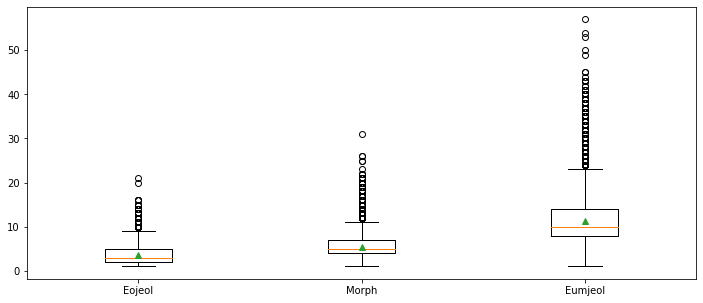

In [12]:
# 박스플롯으로 시각화
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)
# 음절의 분포 정도가 넓음
# 각각의 중앙값은 5~15사이

In [13]:
# Q, A에 대한 문장 길이 분포
q_sentences = list(data['Q'])
a_sentences = list(data['A'])

q_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in q_sentences]
q_sent_len_by_morph = [len(t) for t in q_morph_tokenized_sentences]

a_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in a_sentences]
a_sent_len_by_morph = [len(t) for t in a_morph_tokenized_sentences]

Text(0, 0.5, 'Number of sentences')

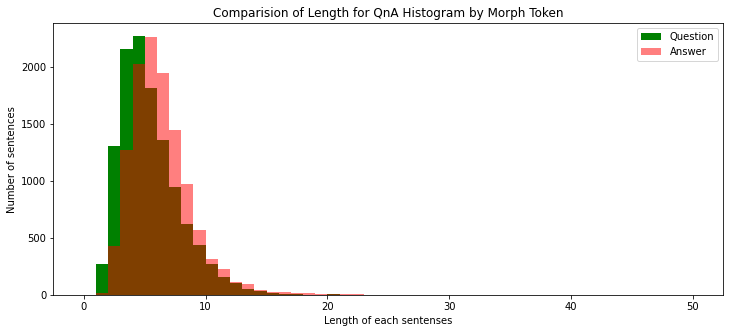

In [14]:
# 히스토그램으로 시각화
plt.figure(figsize=(12, 5))
plt.hist(q_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Question')
plt.hist(a_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Comparision of Length for QnA Histogram by Morph Token')
plt.xlabel('Length of each sentenses')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

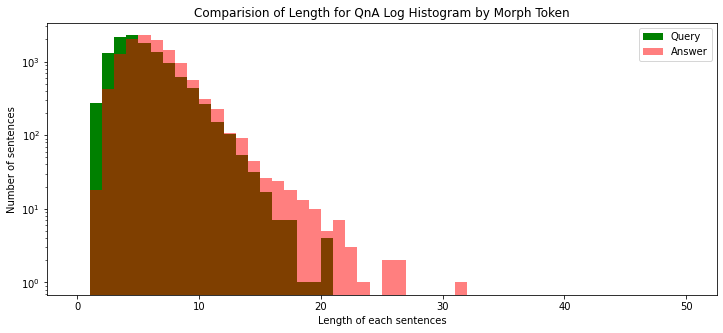

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(q_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(a_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonpositive='clip')
plt.title('Comparision of Length for QnA Log Histogram by Morph Token')
plt.xlabel('Length of each sentences')
plt.ylabel('Number of sentences')

# 답변 데이터에 대한 이상치 확인

In [16]:
# 통계값 분석
print('형태소 최대길이: {}'.format(np.max(q_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(q_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(q_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(q_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(q_sent_len_by_morph)))
print('형태소 1 사분위 길이: {}'.format(np.percentile(q_sent_len_by_morph, 25)))
print('형태소 3 사분위 길이: {}'.format(np.percentile(q_sent_len_by_morph, 75)))

형태소 최대길이: 20
형태소 최소길이: 1
형태소 평균길이: 4.95
형태소 길이 표준편차: 2.48
형태소 중간길이: 4.0
형태소 1 사분위 길이: 3.0
형태소 3 사분위 길이: 6.0


In [17]:
print('형태소 최대길이: {}'.format(np.max(a_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(a_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(a_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(a_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(a_sent_len_by_morph)))
print('형태소 1 사분위 길이: {}'.format(np.percentile(a_sent_len_by_morph, 25)))
print('형태소 3 사분위 길이: {}'.format(np.percentile(a_sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.87
형태소 길이 표준편차: 2.55
형태소 중간길이: 5.0
형태소 1 사분위 길이: 4.0
형태소 3 사분위 길이: 7.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0c44e32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0c44ef070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0c44ef9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff0c45524f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0c4552c10>,
 'means': [<matplotlib.lines.Line2D at 0x7ff0c4552ca0>,
  <matplotlib.lines.Line2D at 0x7ff0c46106d0>]}

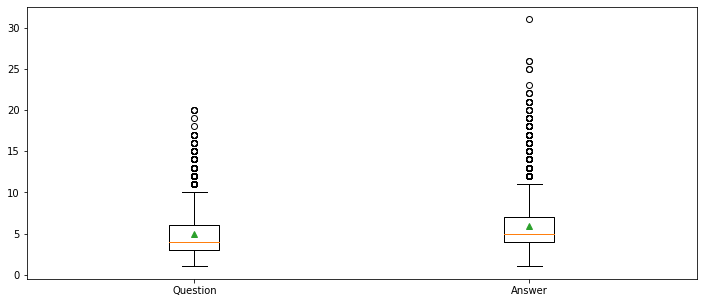

In [18]:
# 박스플롯으로 시각화
plt.figure(figsize=(12, 5))
plt.boxplot([q_sent_len_by_morph, a_sent_len_by_morph],
            labels=['Question', 'Answer'], 
            showmeans=True)

In [19]:
# 어휘 빈도 분석
# Okt의 pos-tagging 모듈을 사용하여 품사별 분류
okt.pos('자연어분석은너무어렵구나')

# 단어와 품사를 튜플 형태로 갖는 리스트 출력

[('자연어', 'Noun'),
 ('분석', 'Noun'),
 ('은', 'Josa'),
 ('너무', 'Adverb'),
 ('어렵구나', 'Adjective')]

In [20]:
q_NVA_token_sentences = list()
a_NVA_token_sentences = list()

for s in q_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag in ['Noun', 'Verb', 'Adjective']:
            q_NVA_token_sentences.append(token)

for s in a_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag in ['Noun', 'Verb', 'Adjective']:
            a_NVA_token_sentences.append(token)
            
q_NVA_token_sentences = ' '.join(q_NVA_token_sentences)
a_NVA_token_sentences = ' '.join(a_NVA_token_sentences)

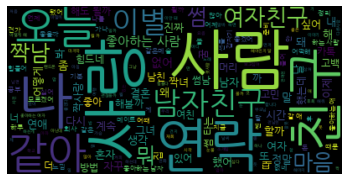

In [21]:
question_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(q_NVA_token_sentences)
plt.imshow(question_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

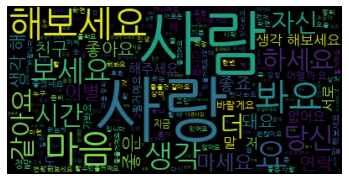

In [22]:
answer_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(a_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()